## Foercasting Bike rental demand by hour

*  Data: 2 years of bike rental data from DC.
*  Goal: build a bodel to forecust how many bikes will be needed for each hour

-------------------------------------------------------------------------------

-  `datetime` - hourly date + timestamp  
-  `season` -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
-  `holiday` - whether the day is considered a holiday
-  `workingday` - whether the day is neither a weekend nor holiday
-  `weather` - ,<br>
             1: Clear, Few clouds, Partly cloudy, Partly cloudy
             2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
             3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
             4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- `temp` - temperature in Celsius
- `atemp` - "feels like" temperature in Celsius
- `humidity` - relative humidity
- `windspeed` - wind speed
- `casual` - number of non-registered user rentals initiated
- `registered` - number of registered user rentals initiated
- `count` - number of total rentals


## 1. First setting

In [1]:
import numpy as np
import pandas as pd

# read in data
main_df = pd.read_csv('C:/Users/naoko/Capstone_project_Udacity/all/train.csv')
main_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


## 2. Data Exprolation

###  Descriptive Stat 

In [18]:
# summary stat

main_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
display(main_df.dtypes)
display(main_df.shape)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

(10886, 12)

####  Add more descriptie features

In [2]:
from datetime import datetime # to deal with date/time
import calendar

# convert data-time into date, hour
main_df["day"] = main_df.datetime.apply(lambda x : x.split()[0])
main_df["hour"] = main_df.datetime.apply(lambda x : x.split()[1].split(":")[0])
main_df["DOW"]  = main_df.day.apply(lambda x : datetime.strptime(x,"%Y-%m-%d").weekday()) # DOW numeric: Mon=0 Sun=6
main_df["month"] =main_df.day.apply(lambda x : datetime.strptime(x,"%Y-%m-%d").month)

# DOW_name: 
# df["DOW"]  =  df.day.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
#Month name:
#df["month"] = df.day.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])


main_df.drop(['datetime', 'day'], axis=1, inplace=True)
main_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,DOW,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,1


###  Missing values 

In [22]:
# check if exist missing values
col_list = main_df.columns
for i in col_list:
    missing = sum(main_df[i].isnull())
    print('{}: missing values are {}'.format(i,missing))

season: missing values are 0
holiday: missing values are 0
workingday: missing values are 0
weather: missing values are 0
temp: missing values are 0
atemp: missing values are 0
humidity: missing values are 0
windspeed: missing values are 0
casual: missing values are 0
registered: missing values are 0
count: missing values are 0
hour: missing values are 0
DOW: missing values are 0
month: missing values are 0


###  Skewness/ Outlier check 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats # notmal denisity plot
%matplotlib inline  # needed for Jpyter note book


UsageError: unrecognized arguments: # needed for Jpyter note book


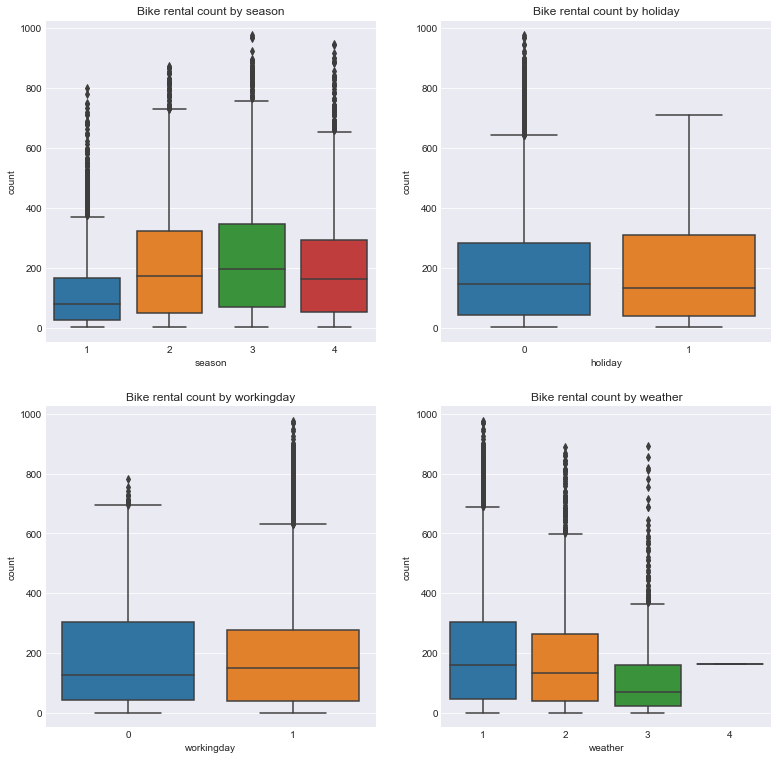

In [69]:
# box plot for cateforical features to see how Bike count is related to each fetures
# Also check outlier points

def sn_box_plot(d1, x_val, y_val, p1,p2):
    '''
    d1    : pd.dataframe
    x_val : x-axis column name
    y_val : y-axis column name
    p1    : column position in plot
    p2    : row position in plot
    '''
    sn.boxplot(data=d1, y=y_val, x=x_val, ax=axes[p1,p2], orient="v")
    axes[p1][p2].set(title="Bike rental count by {}".format(x_val))

    
# plot A using given features

sn.set_style('darkgrid', {'legend.frameon':True})
fig, axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(13,13)

df=main_df
sn_box_plot(d1=df, x_val='season',     y_val='count', p1=0,p2=0 )
sn_box_plot(d1=df, x_val='holiday',    y_val='count', p1=0,p2=1 )
sn_box_plot(d1=df, x_val='workingday', y_val='count', p1=1,p2=0 )
sn_box_plot(d1=df, x_val='weather',    y_val='count', p1=1,p2=1 )


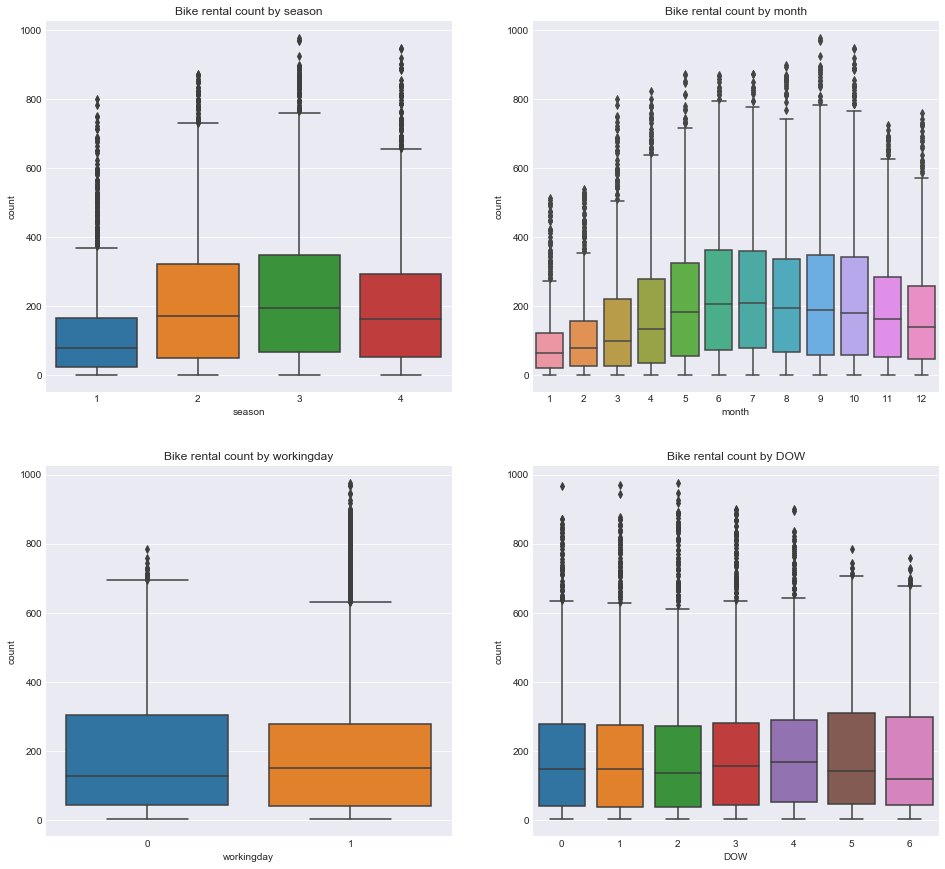

In [29]:
## plotB self defined features

fig, axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(16,15)

df=main_df
sn_box_plot(d1=df, x_val='season',  y_val='count', p1=0,p2=0 )
sn_box_plot(d1=df, x_val='month',   y_val='count', p1=0,p2=1 )
sn_box_plot(d1=df, x_val='workingday',     y_val='count', p1=1,p2=0 )
sn_box_plot(d1=df, x_val='DOW',    y_val='count', p1=1,p2=1 )



In [13]:
main_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,DOW,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,1


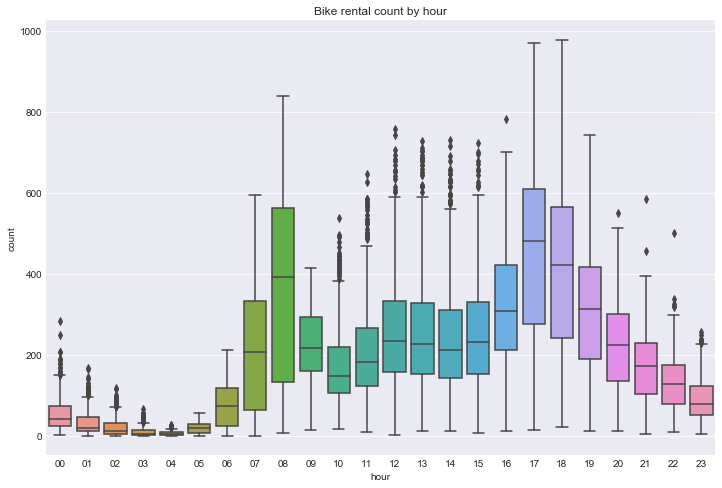

In [24]:
#plot C
fig, axes = plt.subplots()
fig.set_size_inches(12,8)

hour_plot = sn.boxplot( y='count', x='hour', data=main_df)
hour_plot.set_title("Bike rental count by hour")

plt.show()

- `month`, `DOW`, `hour` show crear seasonality pattern
- `DOW` indicates that Mon-Fri ( workday) has more outliers than Sat, and Sunday weekend.
- `hour` plot indicates that  6-9am and 4pm -7pm time periods do not have many outliers--> comuter users?


Text(0,0.5,'bike count')

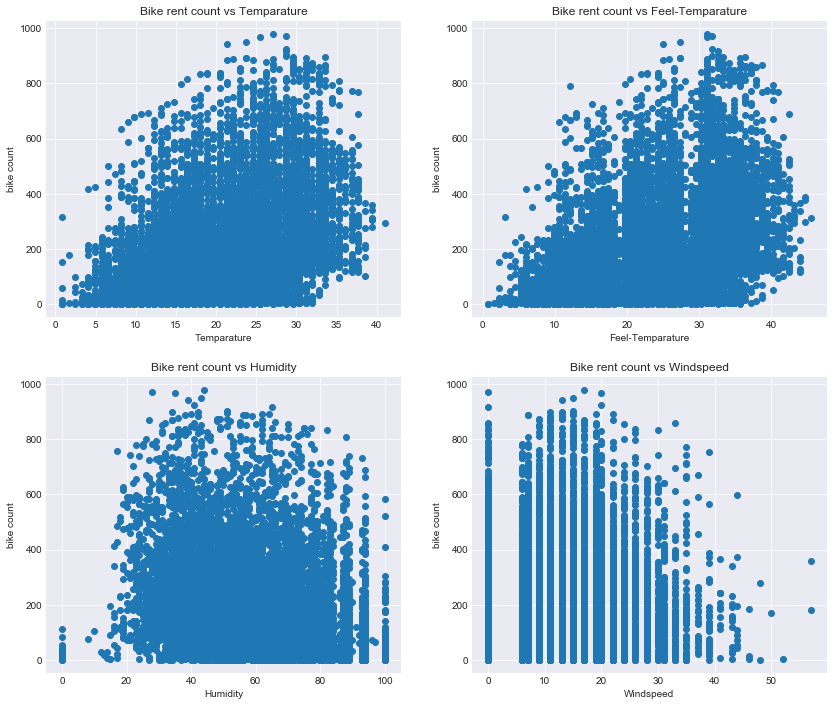

In [32]:
# scatter plot for numerical variables vs bike count
# wanted to use seabone, but my verion of sn didn't have scatterplot module.

fig, axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(14,12)

axes[0,0].scatter(data=df, y='count', x='temp')
axes[0,0].set_title("Bike rent count vs Temparature")
axes[0,0].set_xlabel("Temparature")
axes[0,0].set_ylabel("bike count")

axes[0,1].scatter(data=df, y='count', x='atemp')
axes[0,1].set_title("Bike rent count vs Feel-Temparature")
axes[0,1].set_xlabel("Feel-Temparature")
axes[0,1].set_ylabel("bike count")

axes[1,0].scatter(data=df, y='count', x='humidity')
axes[1,0].set_title("Bike rent count vs Humidity")
axes[1,0].set_xlabel("Humidity")
axes[1,0].set_ylabel("bike count")

axes[1,1].scatter(data=df, y='count', x='windspeed')
axes[1,1].set_title("Bike rent count vs Windspeed")
axes[1,1].set_xlabel("Windspeed")
axes[1,1].set_ylabel("bike count")


- 'temp' and 'atemp' have the almost identical distribution. If they are correlated, remove 'atemp'
- 'humidity' and 'winspeed' plots do not provide much imformation.

### Correlation among features

In [28]:
main_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'DOW',
       'month'],
      dtype='object')

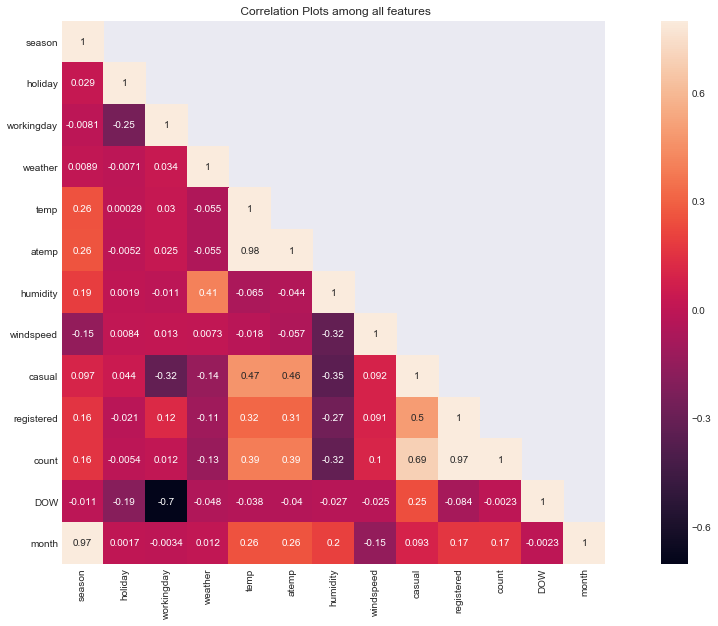

In [29]:
# 
corr_matrix = main_df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

#plot
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr_matrix, mask=mask,vmax=.8, square=True,annot=True)

ax.set_title(" Correlation Plots among all features")

plt.show()


Based on the corrlation matrix, 
Remove 
- 'season' bacause 'season'and 'month' have 0.97 correlation score.
- 'DOW' because 'DOW' and 'workingday' have -0.7 correlation score and 'workingday' has higher correlation score to 'count'.
- 'atemp' beccause 'atemp' and 'temp' have 0.97 correlation score.
- 'winspeed' becasue it has low correlation score of 0.1 to 'count'
- 'weather' becasue it has low correlation to 'count' and alos it has higher correlation to a similar envirometal feature 'humidity'which is correlated to'count' in higher score then 'weather'.

'casual' and 'registered' are leakage variables and we should drop them from training and use only 'count'. However, it maybe a better to create two models, one for 'casual' and for 'registered' and combining estimate from both to be our forecast.

###   Cleaning Data ( removing uncorrelated features and outliers) 

In [4]:
# Drop correlated features
sub_df = main_df.drop(['season','DOW', 'casual','registered'], axis=1)

## need to think about if i wnat to remove this
df_Noout = sub_df[
    np.abs(sub_df["count"]- sub_df["count"].mean()) <= (3*sub_df["count"].std())
] 

print("The number of entries with outliers :{} ".format(main_df.shape[0]) )
print("The number of entries without ouliers: {}".format(df_Noout.shape[0]))

# color marix for val correlation
# plot each column against count

The number of entries with outliers :10886 
The number of entries without ouliers: 10739


### Distribusion of data  :   (With and Without outliers)

C:\Users\naoko\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\naoko\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([  1,   1,   1, ..., 732, 733, 734], dtype=int64)),
 (157.6468423658611, 183.00381786013588, 0.9455240333561122))

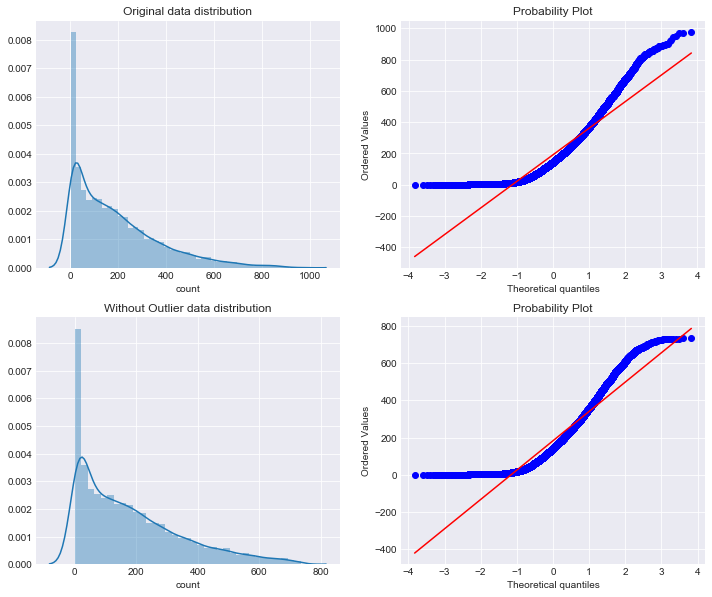

In [31]:
## check underling data distribution

fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)

# distribution plot & Q-Q plot 
sn.distplot(main_df["count"],ax=axes[0][0])
axes[0,0].set_title(label="Original data distribution")
stats.probplot(main_df["count"], dist='norm', fit=True, plot=axes[0][1])

sn.distplot(df_Noout["count"],ax=axes[1][0])
axes[1,0].set_title(label="Without Outlier data distribution")
stats.probplot(df_Noout["count"], dist='norm', fit=True, plot=axes[1][1])


- The `count` data is skewed left and far from normal distribution.
- Without outliers, Q-Q plot seems a bit better.

### LOG transformation

C:\Users\naoko\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


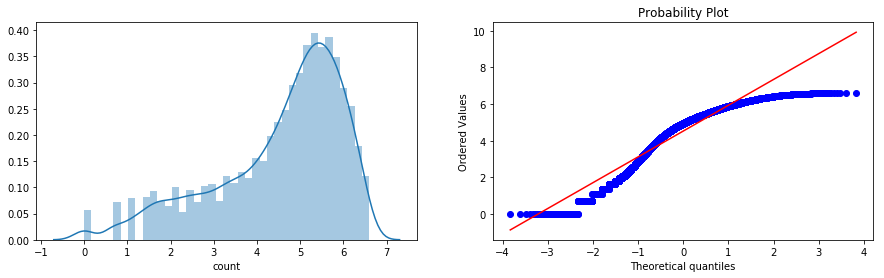

In [65]:
# It is not requirement. but since I'm using partial data whcih might be a cause of skewed data.
# try to transform this to make the data more like normal dist

# log_transform
log_df_count = np.log(df_Noout['count'])

# plot
fig, axes =plt.subplots(nrows=1, ncols=2, squeeze=False)
fig.set_size_inches(15,4)

sn.distplot( log_df_count, ax=axes[0][0])
stats.probplot( log_df_count, dist='norm', fit=True, plot=axes[0][1])

plt.show()

- Log transformed `count` looks beeter, but I'm not sure if thi is better to use for modeling.

## 3.Visualization of Data

###  Visualizing  Bike `count`  against seasonality

<function matplotlib.pyplot.show(*args, **kw)>

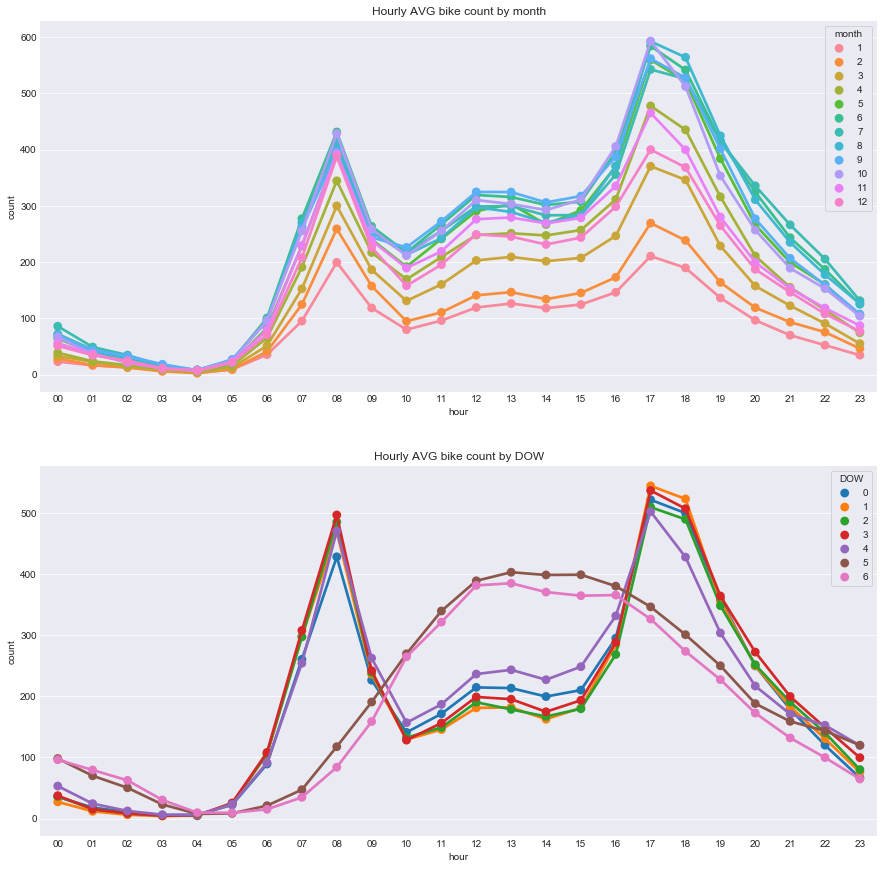

In [25]:
# hour vs month
# hour vs DOW
# hour vs weather

def avg_pointplot(d1, val1,p1,p2):
    # create a new df with averaged bike count by specific val1
    dt =d1[['hour',val1,'count']].groupby(['hour',val1]).mean().reset_index()

    #ploting logic
    sn.pointplot(data=dt, x='hour', y='count', hue=val1, ax=axes[p1,p2])
    axes[p1,p2].set(title="Hourly AVG bike count by {}".format(val1))
                
    
    
fig, axes = plt.subplots(2,1, squeeze=False)
fig.set_size_inches(15,15)

avg_pointplot(d1=main_df, val1='month', p1=0,p2=0)
avg_pointplot(d1=main_df, val1='DOW', p1=1,p2=0)
#avg_pointplot(d1=main_df, val1='weather', p1=2,p2=0)


plt.show

- Hourly trend percists through out evrey month, day of week, and any weather.
- the `DOW` plot shows that weekdays have the same hourly trend as month, but Sat & Sunday have very a different patter on bike counts.

###  Casual vs Registered users
`casual` and `registered` fetures are leakage variables since `count`=`casual` + `registered` and our gal is to estimate `count`. However, they might have some interesting trend which may help develop better model.

Text(0.5,1,' Hourly AVG Bike count for casual vs reistered users')

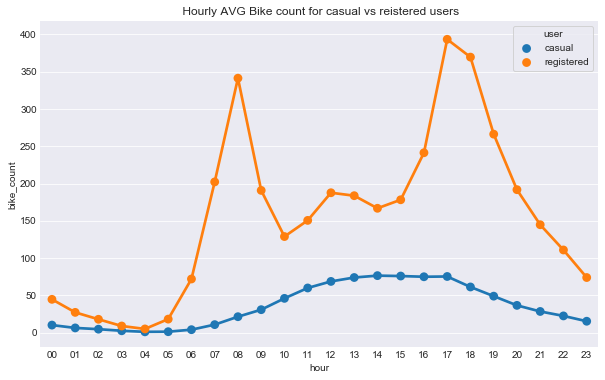

In [70]:
mod_df = pd.melt( main_df, id_vars=['hour'], value_vars=['casual','registered'], var_name='user', value_name='bike_count')
mod_df.tail()

avg_user = mod_df.groupby(['hour','user']).mean().reset_index()
avg_user.head()

fig, axes =plt.subplots(1,1, squeeze=False)
fig.set_size_inches(10,6)

sn.pointplot(data=avg_user, x= 'hour', y='bike_count', hue='user', ax=axes[0,0])
axes[0,0].set_title(label=" Hourly AVG Bike count for casual vs reistered users")


- `Registered` user have the same hourly trend (7-9 am peak and 4-7pm peak), but `casual` users do not have the same trend.

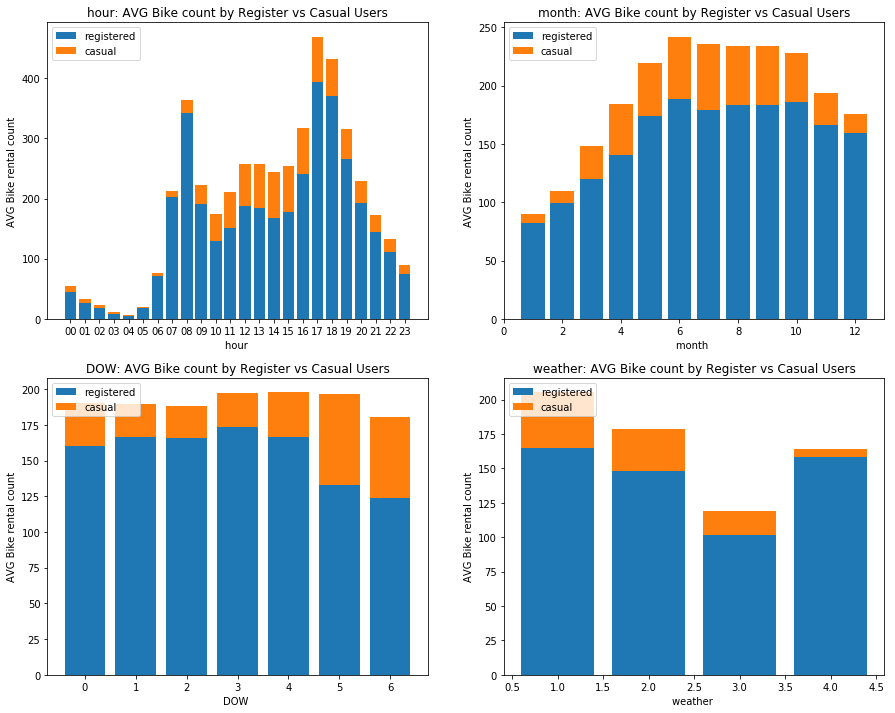

In [8]:
## compare Casual vs Registered User
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated

# based on the Box plots, there are clear relation between the number of Bike count and
# (1) hour
# (2) month
# (3) weather
# (4) maybe DOW


def avg_bar_plot(p1, p2, data, val1):

    # take avarage of Bike count for casula and registered
    AVG_df = pd.DataFrame( data[['casual', 'registered',val1]].groupby([val1]).mean().reset_index())

    # setting up plot
    axes[p1,p2].bar(data=AVG_df, height ='registered', x=val1, label='registered')
    axes[p1,p2].bar(data=AVG_df, height ='casual', x=val1,  label='casual', bottom='registered')
    axes[p1,p2].set_ylabel('AVG Bike rental count')
    axes[p1,p2].set_xlabel('{} '.format(val1))
    axes[p1,p2].legend(loc="upper left")
    axes[p1,p2].set_title("{}: AVG Bike count by Register vs Casual Users".format(val1))

    
#Plot using bar_plot module
fig, axes=plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15,12)

avg_bar_plot(p1=0, p2=0, data=main_df, val1='hour')
avg_bar_plot(p1=0, p2=1, data=main_df, val1='month')
avg_bar_plot(p1=1, p2=0, data=main_df, val1='DOW')
avg_bar_plot(p1=1, p2=1, data=main_df, val1='weather')


plt.show()



There is a noticiable difference between Casual vs Registered uses.
- Casual users usage increse on sat an Sun day, but Registered users usage decline during weekends.
- casual users usage is low during morning whear as Registered users usage increase during the same time.

## 4.MODELING

### Subset data into trainng and test set

First use the data without Outlier and all correlated fetarues are removed. <br>
Second log-transfer the data to see if it will improve

In [132]:
# df_Noout
df_Noout.head(2)

,holiday,workingday,temp,atemp,humidity,count,hour,month
0,0,0,9.84,14.395,81,16,00,1
1,0,0,9.02,13.635,80,40,01,1


In [5]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y_data = df_Noout['count']
x_data = df_Noout.drop(['count'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=13 )
display(x_train.head(2), x_train.shape)
display(x_test.head(2), x_test.shape)
display(y_train.head(2), y_train.shape)

x_train, x_test, y_log_train, y_log_test = train_test_split(x_data, np.log(y_data), test_size=0.2, random_state=13 )



,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
1271,0,1,1,18.04,21.970,58,12.9980,19,3
734,0,0,1,16.40,20.455,35,23.9994,23,2


(8591, 9)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
3680,0,0,1,26.24,28.79,84,15.0013,06,9
78,0,1,2,6.56,6.82,69,22.0028,10,1


(2148, 9)

1271    207
734      30
Name: count, dtype: int64

(8591,)

## RMSLE function

In [6]:
def calc_RMSLE(y_est, y_act):
    #RMSLE : sqrt( (1/n)* sum( (log( (y_pred+1)/(y_train+1)))^2 ) )
    RMSLE = np.sqrt(
              (1/len(y_act))*sum( np.log( (y_est+1)/(y_act+1) )**2  )
              )
    print(RMSLE)
    

#print('Adaboost with Regtree MSError: {}'.format( np.mean((y_pred - y_train) ** 2)))
      
#print('Adaboost with Regtree RMSLE: {}'.format( calc_RMSLE(y_pred, y_train)))


# Train Model

## Adaboost with differnt n_estimator

In [84]:
# fit Regression with Noout_data
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

adaReg0 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=50,    # default 50
                           learning_rate=1.0,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg1 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=100,    # default 50
                           learning_rate=1.0,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg2 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=1.0,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )
adaReg21 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=1000,    # default 50
                           learning_rate=1.0,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg3 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=10000,    # default 50
                           learning_rate=1.0,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg0.fit(x_train,y_train)
y_pred0 = adaReg0.predict(x_train) 

adaReg1.fit(x_train, y_train)
y_pred1 = adaReg1.predict(x_train)

adaReg2.fit(x_train, y_train)
y_pred2 = adaReg2.predict(x_train)

adaReg21.fit(x_train, y_train)
y_pred21 = adaReg21.predict(x_train)

adaReg3.fit(x_train, y_train)
y_pred3 = adaReg3.predict(x_train)



### Plot y_train vs y_pred

In [85]:
x_plot = x_train['hour'].reset_index() 
y_plot = y_train.reset_index().drop('index', axis=1)

che = pd.concat([x_plot, y_plot],axis=1)

che['y_pred01']  = y_pred1
che['y_pred02']  = y_pred2
che['y_pred21'] = y_pred21
che['y_pred03']  = y_pred3




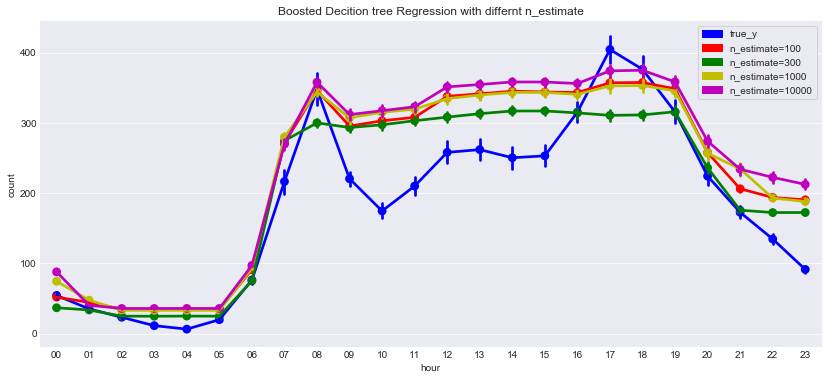

In [86]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
fig.set_size_inches(14,6)

# color : 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p1 =sn.pointplot(x='hour',  y='count', data=che, color= 'b')
p2 =sn.pointplot(x='hour',  y='y_pred01', data=che, color=  'r')
p21 =sn.pointplot(x='hour', y='y_pred02', data=che, color=  'g')
p3 =sn.pointplot(x='hour',  y='y_pred21', data=che, color=  'y')
p4 =sn.pointplot(x='hour',  y='y_pred03', data=che, color=  'm')


p1_patch = mpatches.Patch(color='b', label='true_y')
p2_patch = mpatches.Patch(color='r', label='n_estimate=100')
p21_patch = mpatches.Patch(color='g', label='n_estimate=300')
p3_patch = mpatches.Patch(color='y', label='n_estimate=1000')
p4_patch = mpatches.Patch(color='m', label='n_estimate=10000')
plt.legend(handles=[p1_patch, p2_patch, p21_patch,p3_patch, p4_patch])

ax.set_xlabel('hour')
ax.set_ylabel('count')
ax.set_title("Boosted Decition tree Regression with differnt n_estimate")

plt.show()
#



In [83]:

# error vs n_estimator
def calc_RMSLE(y_est, y_act):
    #RMSLE : sqrt( (1/n)* sum( (log( (y_pred+1)/(y_train+1)))^2 ) )
    RMSLE = np.sqrt(
              (1/len(y_act))*sum( np.log( (y_est+1)/(y_act+1) )**2  )
              )
    print(RMSLE)
    
Error_n50 = calc_RMSLE(y_pred0, y_train)    
Error_n100 = calc_RMSLE(y_pred1, y_train)
Error_n300 = calc_RMSLE(y_pred2, y_train)
Error_n1000 = calc_RMSLE(y_pred21, y_train)
Error_n10000 = calc_RMSLE(y_pred3, y_train)



0.9639517804564169
0.9896963250997499
0.9799722874108983
1.0663793222044498
0.9492107603931961


## Adaboost with differnt learning rate  ( n_estimator=300)

In [75]:
# fit Regression with Noout_data
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostRegressor

adaReg4 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.1,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg5 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.01,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )
adaReg6 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.001,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )

adaReg7 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.0001,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )
adaReg8 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.00001,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )


adaReg4.fit(x_train, y_train)
y_pred4 = adaReg4.predict(x_train)

adaReg5.fit(x_train, y_train)
y_pred5 = adaReg5.predict(x_train)

adaReg6.fit(x_train, y_train)
y_pred6 = adaReg6.predict(x_train)

adaReg7.fit(x_train, y_train)
y_pred7 = adaReg7.predict(x_train)

adaReg8.fit(x_train, y_train)
y_pred8 = adaReg8.predict(x_train)



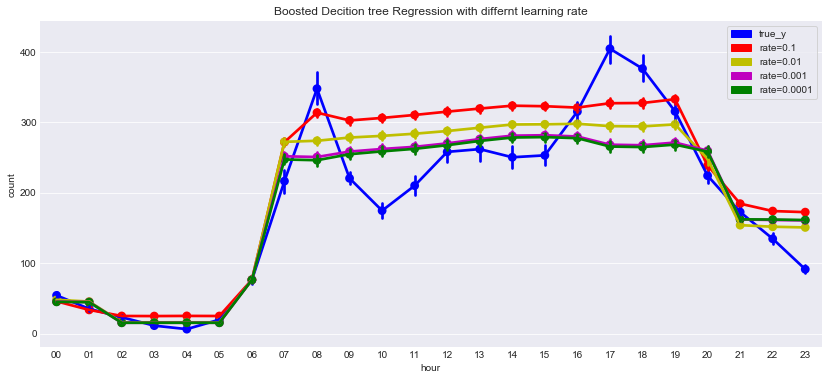

In [76]:
### for plotting
x_plot = x_train['hour'].reset_index() 
y_plot = y_train.reset_index().drop('index', axis=1)

che = pd.concat([x_plot, y_plot],axis=1)

che['y_pred04'] = y_pred4
che['y_pred05'] = y_pred5
che['y_pred06'] = y_pred6
che['y_pred07'] = y_pred7


fig, ax = plt.subplots()
fig.set_size_inches(14,6)

# color : 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p1 =sn.pointplot(x='hour', y='count', data=che, color= 'b')
p2 =sn.pointplot(x='hour', y='y_pred04', data=che, color=  'r')
p3 =sn.pointplot(x='hour', y='y_pred05', data=che, color=  'y')
p4 =sn.pointplot(x='hour', y='y_pred06', data=che, color=  'm')
p5 =sn.pointplot(x='hour', y='y_pred07', data=che, color=  'g')


p1_patch = mpatches.Patch(color='b', label='true_y')
p2_patch = mpatches.Patch(color='r', label='rate=0.1')
p3_patch = mpatches.Patch(color='y', label='rate=0.01')
p4_patch = mpatches.Patch(color='m', label='rate=0.001')
p5_patch = mpatches.Patch(color='g', label='rate=0.0001')
plt.legend(handles=[p1_patch, p2_patch, p3_patch, p4_patch,p5_patch])

ax.set_xlabel('hour')
ax.set_ylabel('count')
ax.set_title("Boosted Decition tree Regression with differnt learning rate")

plt.show()
#




In [61]:
Error_R05 = calc_RMSLE(y_pred4, y_train)
Error_R01 = calc_RMSLE(y_pred5, y_train)
Error_R001 = calc_RMSLE(y_pred6, y_train)
Error_R0001 = calc_RMSLE(y_pred7, y_train)
Error_R00001 = calc_RMSLE(y_pred8, y_train)


0.9032254601087737
0.8031677974850083
0.793078434975764
0.7916329693831966
0.7917126316945078


### Check the model with testing set

In [116]:
y_test[:3]

3680      3
78       42
3711    389
Name: count, dtype: int64

In [68]:
# best RMSLE is 0.79
# the model is 
adaReg7 = AdaBoostRegressor( base_estimator=DecisionTreeRegressor(max_depth=3), # default 
                           n_estimators=300,    # default 50
                           learning_rate=0.0001,  # default 1.0
                           loss='linear',      # default linear, choise, square, expo
                           random_state=None   # default none
                          )


adaReg7.fit(x_test, y_test)
y_pred7_test = adaReg7.predict(x_test)


#calc RMSE

print("RMSLE for this model on Testing data is {}".format(calc_RMSLE(y_pred7_test, y_test)))


0.7679144623878283
RMSLE for this model on Testing data is None


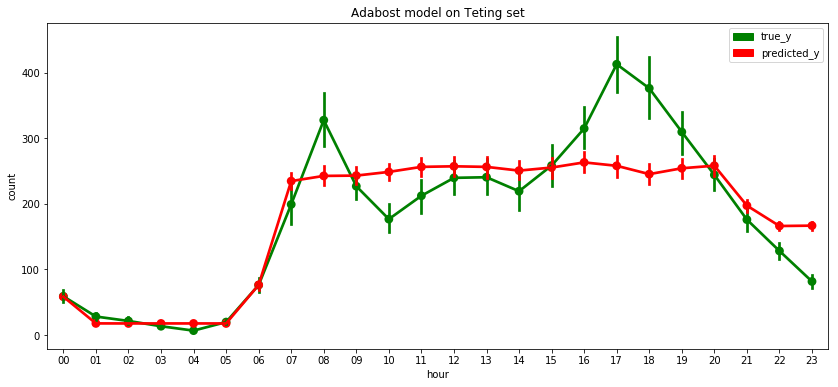

0.763875923820507
RMSLE for this model on Testing data is None


In [64]:


#for plotting
xplot=x_test['hour'].reset_index()
yplot= y_test.reset_index().drop('index',axis=1)

che_test=pd.concat([xplot, yplot],axis=1)
che_test['y_pred'] = y_pred7_test
che_test.head(2)


fig, ax =plt.subplots()
fig.set_size_inches(14,6)

p_test1 =sn.pointplot(x='hour', y='count', data=che_test, color=  'g')
p_test2 =sn.pointplot(x='hour', y='y_pred', data=che_test, color=  'r')


p1_patch = mpatches.Patch(color='g', label='true_y')
p2_patch = mpatches.Patch(color='r', label='predicted_y')
plt.legend(handles=[p1_patch, p2_patch,])

ax.set_xlabel('hour')
ax.set_ylabel('count')
ax.set_title("Adabost model on Teting set")


plt.show()


